In [408]:
import numpy as np
import pandas as pd


In [409]:
clusters_centers=np.array([[2,4],[1,7]])


In [410]:
data_points=np.array([[3,5],[4,6],[2,8],[2,3],[1,4]])

In [411]:
print(clusters_centers[1])


[1 7]


In [412]:
print(data_points[1])

[4 6]


In [413]:
# q=2

In [414]:
# lamda=1

### calculating distance between the data points and the cluster centers


In [415]:
def distance(x,y):
    return np.sqrt(np.sum(pow((x-y),2)))

In [416]:
import decimal
def CalculateDisance(datapoints,clusters):
  distances=[]
  for i in datapoints: #i=0
    for j in clusters:#j=0
      distances.append(distance(i,j))
  return np.array(distances).reshape(len(datapoints),len(clusters))

In [417]:
x=CalculateDisance(data_points,clusters_centers)
print(x)

[[1.41421356 2.82842712]
 [2.82842712 3.16227766]
 [4.         1.41421356]
 [1.         4.12310563]
 [1.         3.        ]]


### calculating membership 


### ps: Rnk = (1/distance_to_cluster)**(2/(q-1))

In [418]:
from numpy import array

def CalculateMembership(distances, q):
   membership =[]
   x=len(distances)
   y=len(distances[0])
   for i in range(x):  
     for j in range(y): 
       current=distances[i][j]
       value = sum([(distances[i][j]/distances[i][k])**(2/(q-1)) for k in range(len(distances[0]))]) 
       membership.append(1/value)
   return np.array(membership).reshape(x,y)

 

In [419]:
m=CalculateMembership(x,2)
print(m)

[[0.8        0.2       ]
 [0.55555556 0.44444444]
 [0.11111111 0.88888889]
 [0.94444444 0.05555556]
 [0.9        0.1       ]]


### updating cluster means

In [420]:
def UpdateClusterMean(membership, datapoints, q):
   new_clusters = [] 
   numerator=0
   denumenator=0
   for j in range(len(membership[0])): #cluster
      numerator=0
      denumenator=0
      for k in range(len(datapoints)): #points
       numerator=numerator+(pow(membership[k][j],q))*datapoints[k]
       denumenator=denumenator+(pow(membership[k][j],q))
      new_clusters.append(numerator/denumenator)
       

   return new_clusters

In [421]:
y=UpdateClusterMean(m, data_points, 2)
print(y)

[array([2.16796477, 4.15572554]), array([2.4084223 , 7.45183867])]


### Calculating  Objective Function

based on datapoints and their memberships

In [422]:
import math
def CalculateObjectiveFunc(datapts, membership, clusters, q, lamda):
    J=0
    J2=0
    curr=0
    mem=np.array(membership)
    for i in range(mem.shape[0]): #datapoints
        for j in range(mem.shape[1]): #cluster
            J=J+ pow(membership[i][j],q) * pow(distance(datapts[i],clusters[j]),2)
    for i in range(mem.shape[0]):
      for j in range(mem.shape[1]):
        membership[i][j]
        curr= math.ceil(membership[i][j])-1
        J2=J2+(lamda*curr)

    return J+J2 
            





In [423]:
o=CalculateObjectiveFunc(data_points, m, clusters_centers, 2, 1)
print(o)

9.666666666666668


### we will repeat all prev steps until convergence

In [424]:
def ReachConvergence(datapts, clusters, q, lamda):
    dist = CalculateDisance(datapts, clusters)
    membership = CalculateMembership(dist, q)
    j_old= CalculateObjectiveFunc(datapts, membership, clusters, q, lamda)
    new_centers = UpdateClusterMean(membership, datapts, q)
    while True:
        dist = CalculateDisance(datapts, new_centers)
        membership = CalculateMembership(dist, q)
        j= CalculateObjectiveFunc(datapts, membership, new_centers, q, lamda)
        # print(x)
        
        if abs(j - j_old) < 0.01:
            break
        j_old = j

        new_centers = UpdateClusterMean(membership, datapts, q)
    return membership, new_centers



### **TESTING**

In [425]:
membership, new_centers = ReachConvergence(data_points, clusters_centers, 2, 1)
print("final_membership:")

print(membership)


print("final_cluster_centers:")

print(new_centers)

final_membership:
[[0.46963323 0.53036677]
 [0.12940992 0.87059008]
 [0.12373775 0.87626225]
 [0.96058636 0.03941364]
 [0.95198272 0.04801728]]
final_cluster_centers:
[array([1.70036649, 3.71861393]), array([2.97762184, 6.71728171])]


### **BONUS PART**

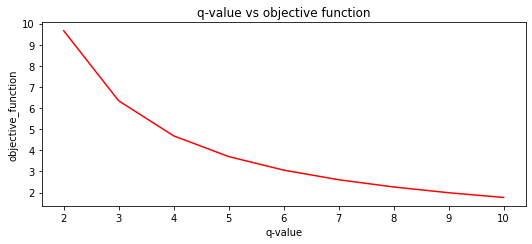

In [426]:
from matplotlib import pyplot as plt
import seaborn as sns 
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
q=[2,3,4,5,6,7,8,9,10]
def plot():
   x=[]
   for i in q:
    x.append(calc_obj_func(data_points, m, clusters_centers, i, 1))

   return x

plt.xlabel('q-value'); plt.ylabel('objective_function');
plt.title('q-value vs objective function');
plt.plot(q, plot(), color='red')
plt.show()






based on the graphy we will definetly take the q that min the objective function;however, we don't wish to take a very large q bec it will result in so many iterations

so a suitable answer will be q=5